<a href="https://colab.research.google.com/github/Ronith2205/AIML_LAB/blob/main/AIML_LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Optional for better visualization
sns.set(style="whitegrid")


In [ ]:
# Load the Titanic dataset
df = pd.read_csv("/content/titanic_train.csv")

# Display the first few rows
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Check data types of each feature
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
# Generate a statistical summary
summary_stats = df.describe(percentiles=[.25, .5, .75, .9])
print(summary_stats)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
90%      2.000000   77.958300  
max      6.

In [ ]:
# List the columns/features in the dataset
columns = df.columns
print(columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


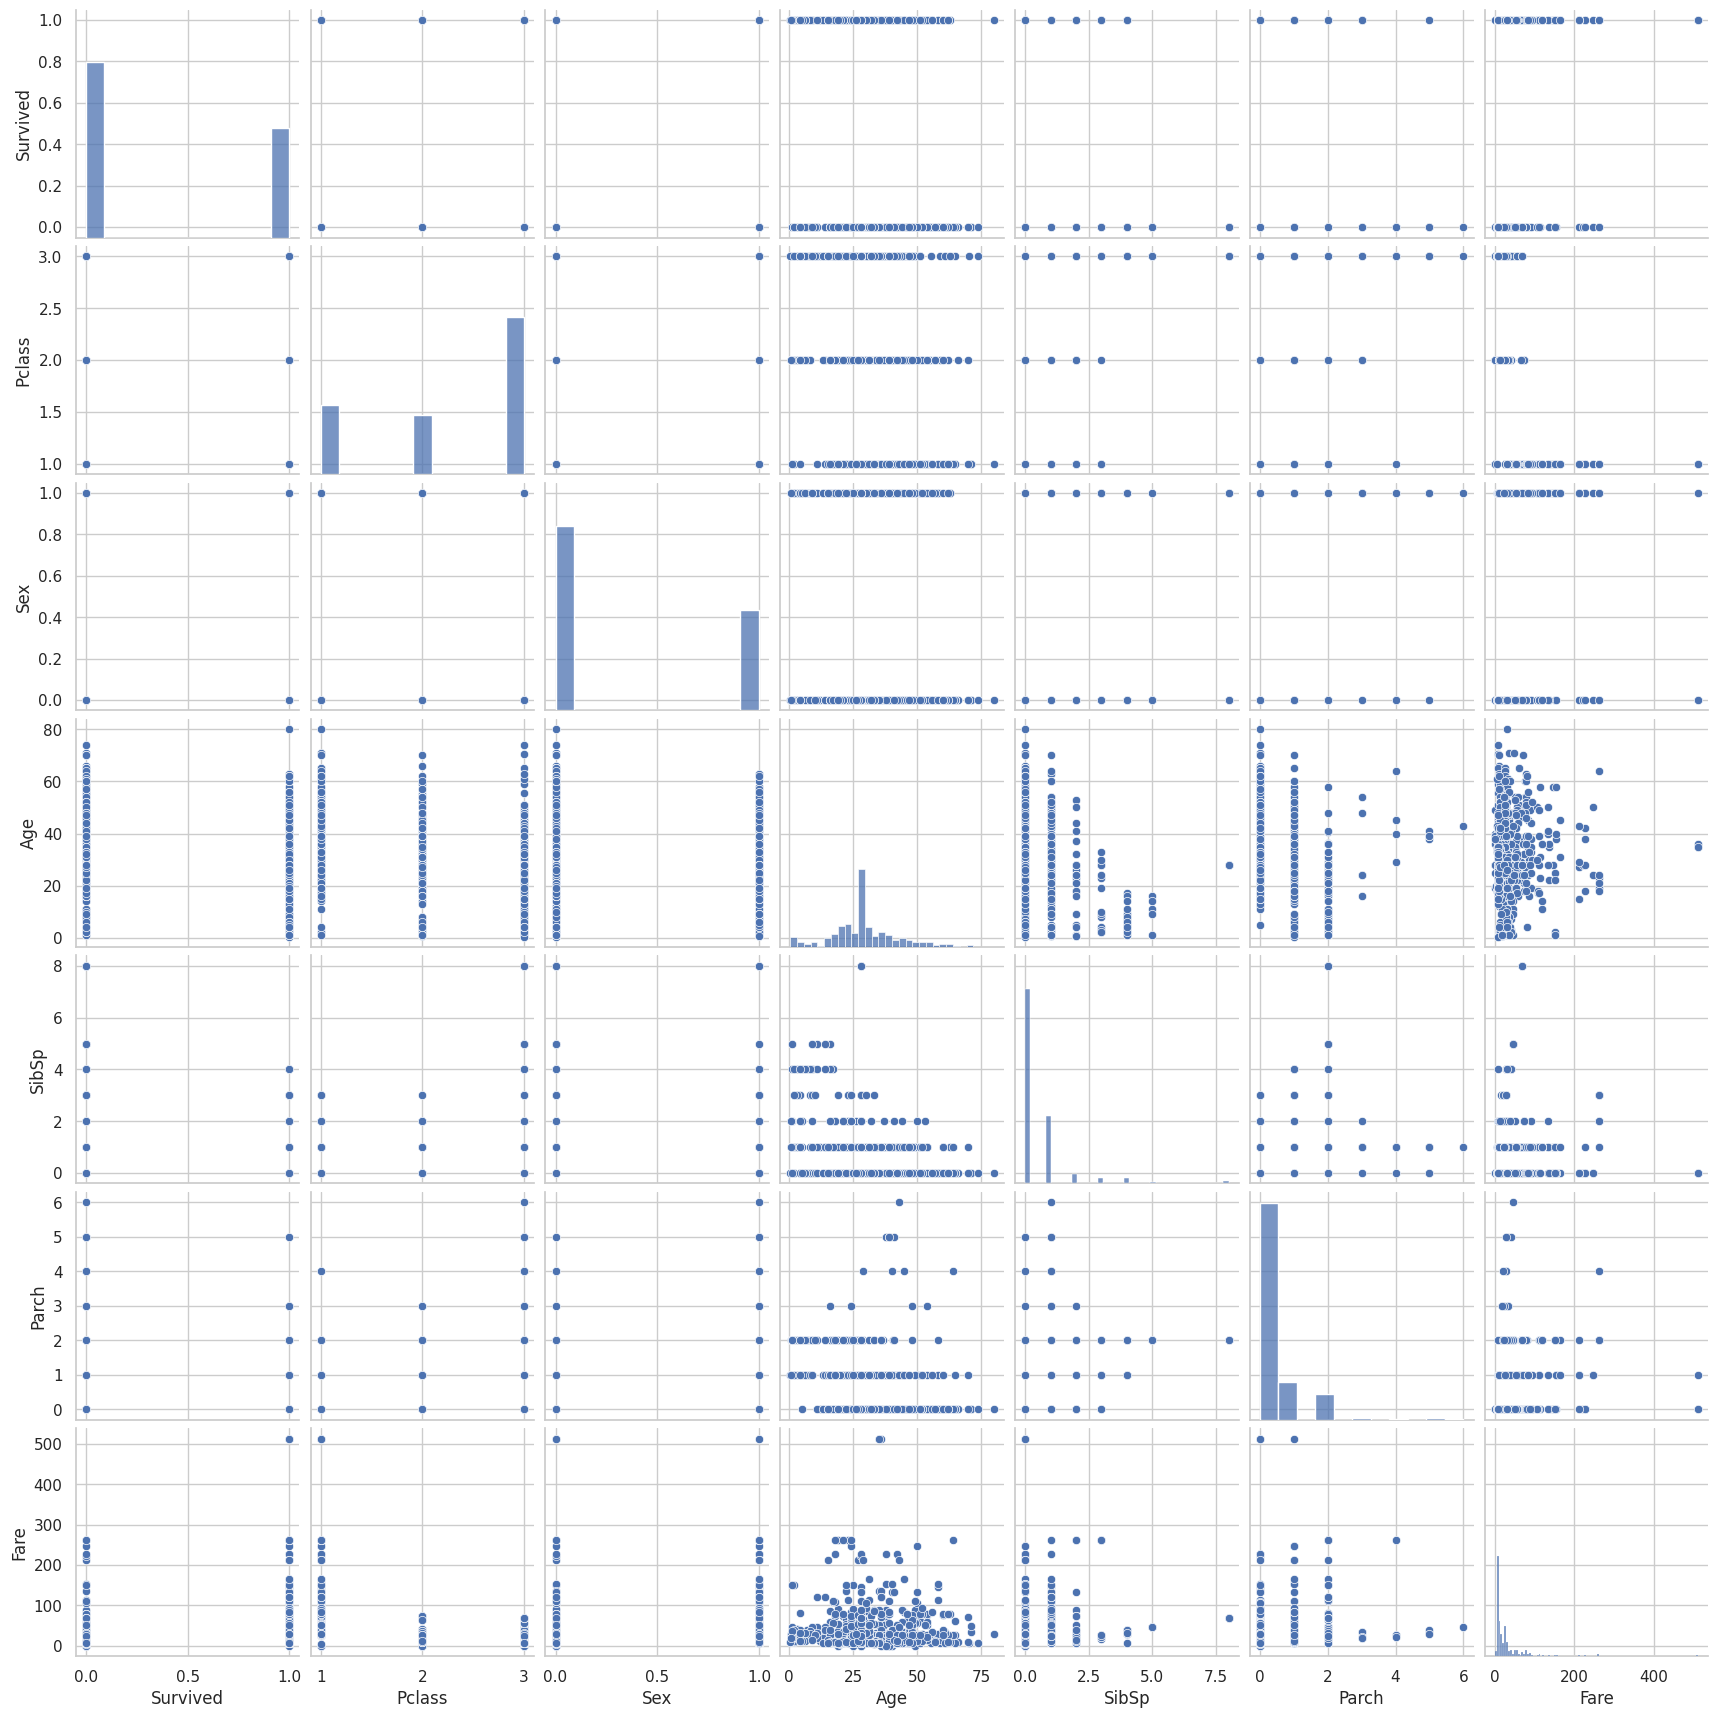

In [ ]:
# Pairplot of numerical features
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()


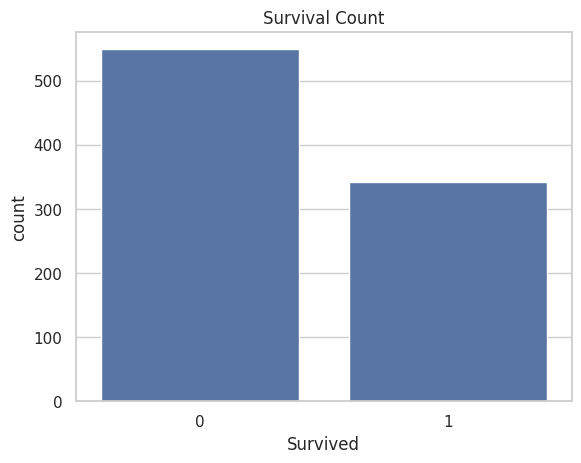

In [ ]:
# Bar plot of survived vs not survived
sns.countplot(x="Survived", data=df,)
plt.title("Survival Count")
plt.show()


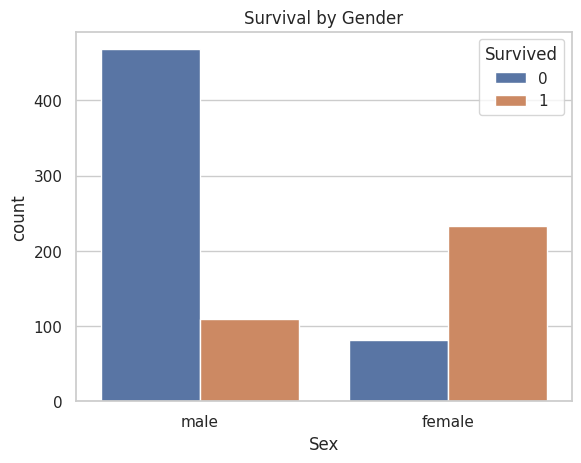

In [ ]:
# Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()


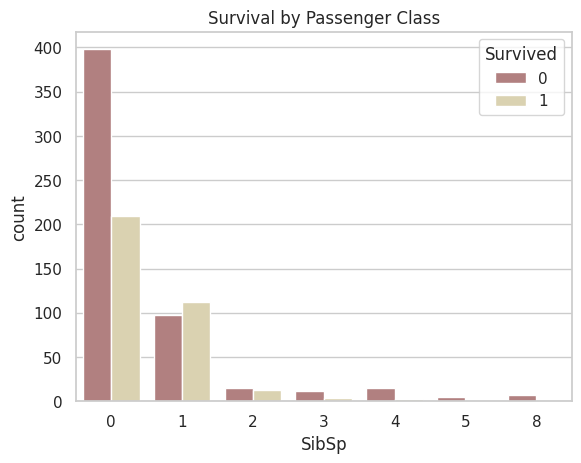

In [ ]:
# Passenger class vs Survival
sns.countplot(x='SibSp', hue='Survived', data=df,palette='pink')
plt.title('Survival by Passenger Class')
plt.show()


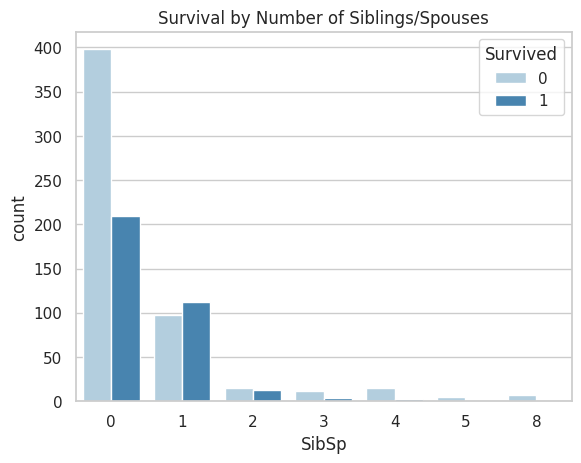

In [ ]:
# Survival based on number of siblings/spouses
sns.countplot(x='SibSp', hue='Survived', data=df,palette="Blues")
plt.title('Survival by Number of Siblings/Spouses')
plt.show()


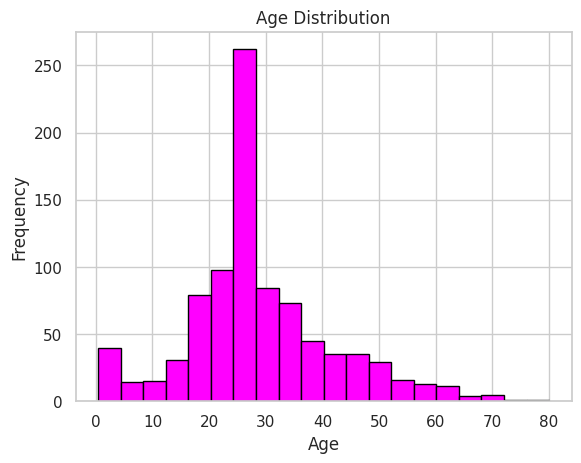

In [ ]:
# Histogram of age distribution
df['Age'].hist(bins=20, edgecolor='black',color="magenta")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-24-c722b7a46c01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df,palette="pink")


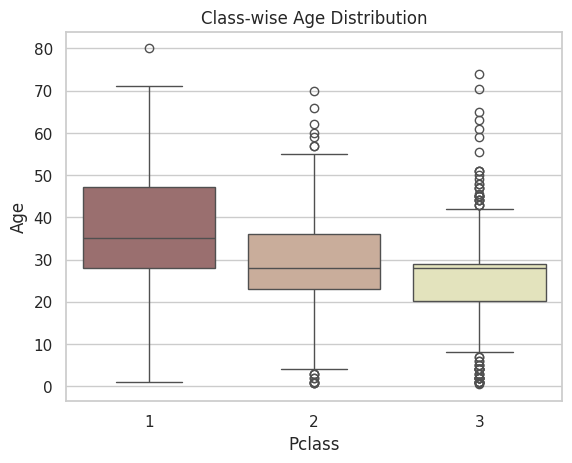

In [ ]:
# Boxplot for age distribution by class
sns.boxplot(x='Pclass', y='Age', data=df,palette="pink")
plt.title('Class-wise Age Distribution')
plt.show()


In [ ]:
# Fill missing age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
# Drop columns that are not needed for modeling
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [ ]:
# Convert categorical variables to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [ ]:
# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)


In [ ]:
# Fit the model to the training data
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

F1 Score: 0.7638888888888888


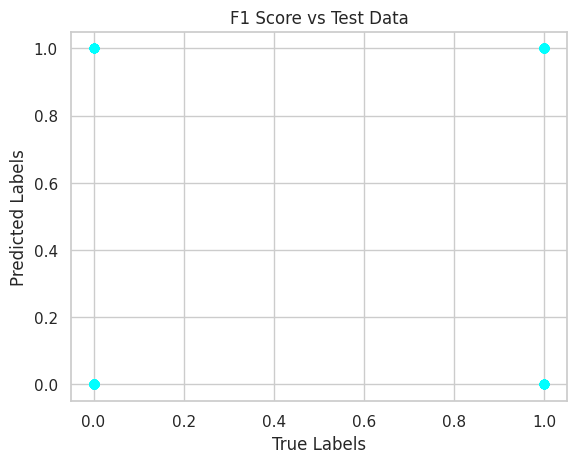

In [ ]:
# Predict using test data
y_pred = log_model.predict(X_test)

# Compute F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Plot F1 score as a function of the test data
plt.scatter(y_test, y_pred,color='cyan')
plt.title('F1 Score vs Test Data')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()
